# Final Project

# Using Time series analysis for S&P500 Index

Written by Amin Khoshkenar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import mplfinance as fplt
import yfinance as yf 
import datetime 

Here, using yfinance, the data of S&P500 (GSPC) will be downloaded and saved as the data:

In [2]:
#start and end dates 
start_date = datetime.datetime(2017, 1, 1) 
end_date = datetime.datetime(2023, 11, 30) 
#Fetch data from Yahoo Finance 
data = yf.download("^GSPC", start=start_date, end=end_date) 
#Print the retrieved data 
print(data.head())

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-01-03  2251.570068  2263.879883  2245.129883  2257.830078  2257.830078   
2017-01-04  2261.600098  2272.820068  2261.600098  2270.750000  2270.750000   
2017-01-05  2268.179932  2271.500000  2260.449951  2269.000000  2269.000000   
2017-01-06  2271.139893  2282.100098  2264.060059  2276.979980  2276.979980   
2017-01-09  2273.590088  2275.489990  2268.899902  2268.899902  2268.899902   

                Volume  
Date                    
2017-01-03  3773010000  
2017-01-04  3768890000  
2017-01-05  3785080000  
2017-01-06  3342080000  
2017-01-09  3219730000  


In [3]:
print(type(data))
data.shape

<class 'pandas.core.frame.DataFrame'>


(1739, 6)

Now, the data received from yahoo finance can be printed and its description is as below:

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-22,4553.040039,4568.430176,4545.049805,4556.620117,4556.620117,3042810000
2023-11-24,4555.839844,4560.310059,4552.799805,4559.339844,4559.339844,1639500000
2023-11-27,4554.859863,4560.520020,4546.319824,4550.430176,4550.430176,3403990000
2023-11-28,4545.549805,4568.140137,4540.509766,4554.890137,4554.890137,3586240000
2023-11-29,4571.839844,4587.640137,4547.149902,4550.580078,4550.580078,4418760000


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1739.000000,1739.000000,1739.000000,1739.000000,1739.000000,1.739000e+03
mean,3409.882291,3429.123772,3389.217341,3410.342255,3410.342255,4.083720e+09
std,746.730882,751.918496,741.661523,746.946691,746.946691,1.017912e+09
min,2251.570068,2263.879883,2191.860107,2237.399902,2237.399902,1.296530e+09
25%,2750.435059,2762.440063,2731.994995,2747.315063,2747.315063,3.444920e+09
50%,3247.229980,3272.169922,3232.429932,3251.840088,3251.840088,3.867640e+09
75%,4130.514893,4156.395020,4107.255127,4134.229980,4134.229980,4.466460e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,9.976520e+09


In this step, I use loc.plot and fplt.plot to have the price tolerance of each year from 2017 to 2023 in line and candle formats:

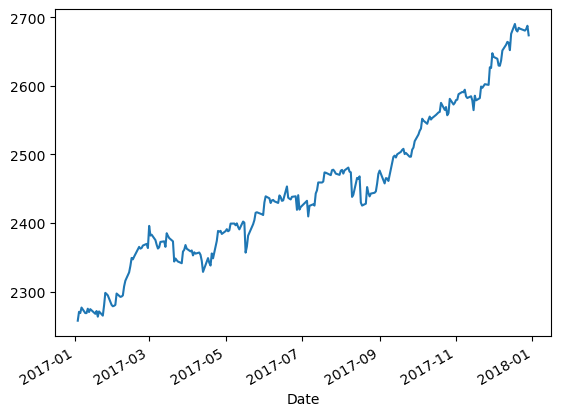

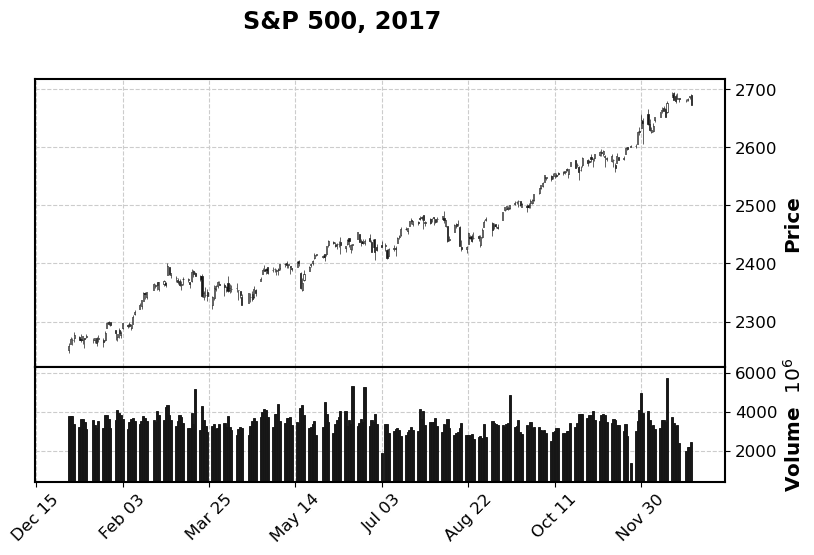

In [7]:
#line format
data.loc['2017', 'Close'].plot()
#Candlestick format
fplt.plot(data.loc['2017-01-01': '2018-01-01', :], type = 'candle', 
          style = 'classic', volume  = True, show_nontrading = True,
           figratio = (10,6), title = 'S&P 500, 2017')

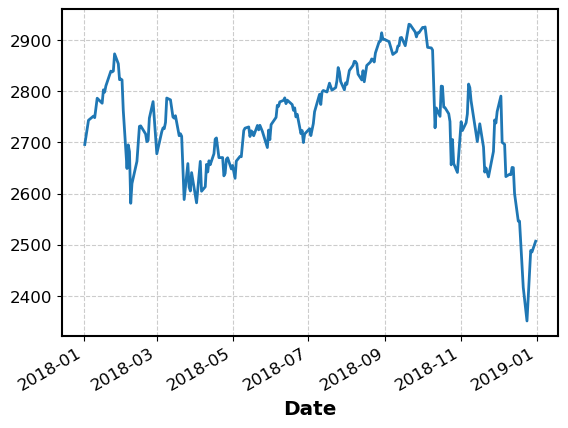

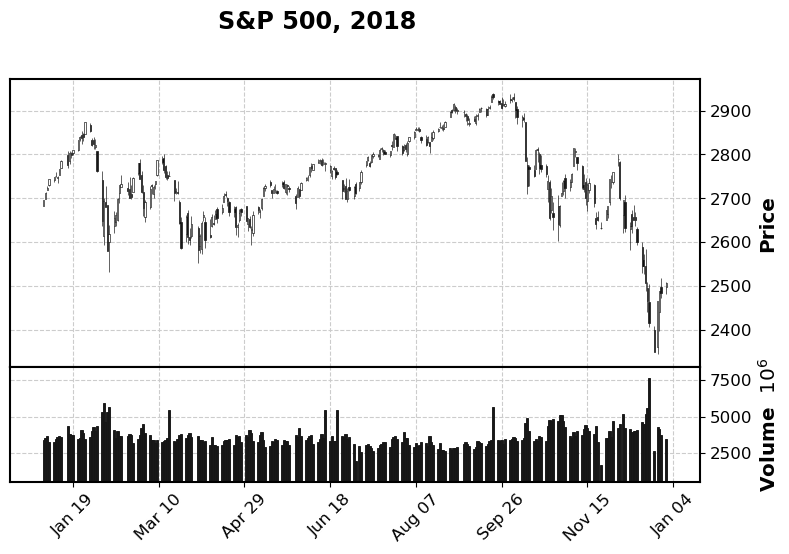

In [8]:
#line format
data.loc['2018', 'Close'].plot()
#Candlestick format
fplt.plot(data.loc['2018-01-01': '2019-01-01', :], type = 'candle', 
          style = 'classic', volume  = True, show_nontrading = True,
           figratio = (10,6), title = 'S&P 500, 2018')

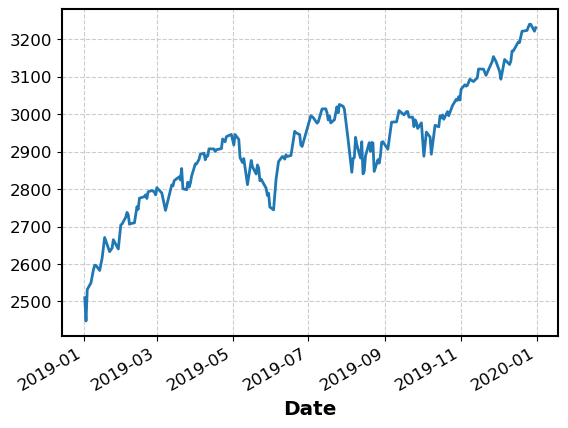

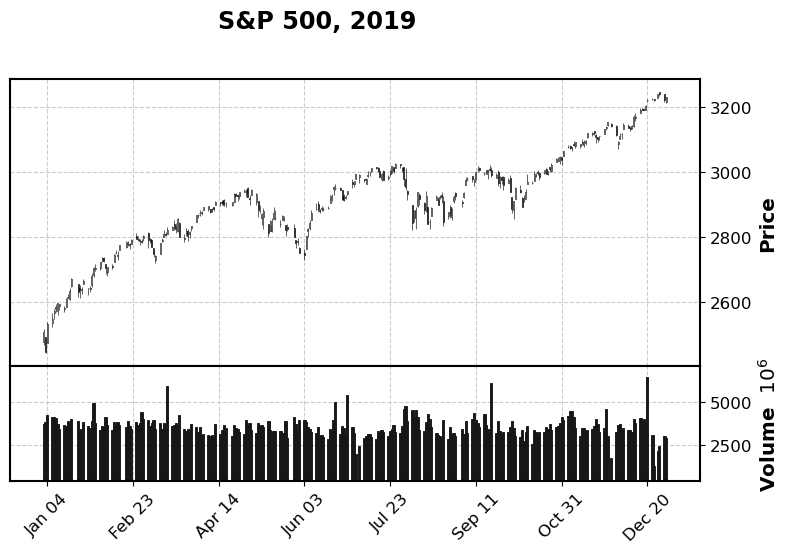

In [9]:
#line format
data.loc['2019', 'Close'].plot()
#Candlestick format
fplt.plot(data.loc['2019-01-01': '2020-01-01', :], type = 'candle', 
          style = 'classic', volume  = True, show_nontrading = True,
           figratio = (10,6), title = 'S&P 500, 2019')

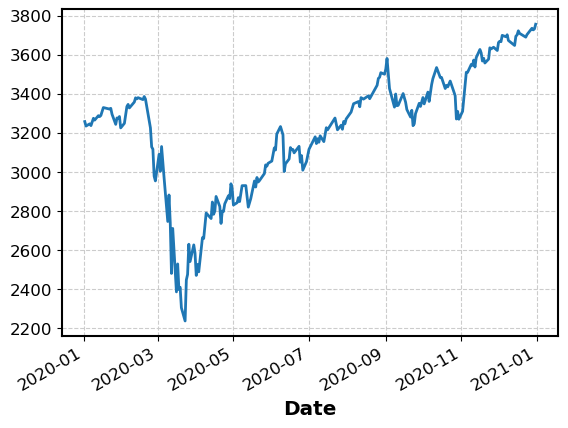

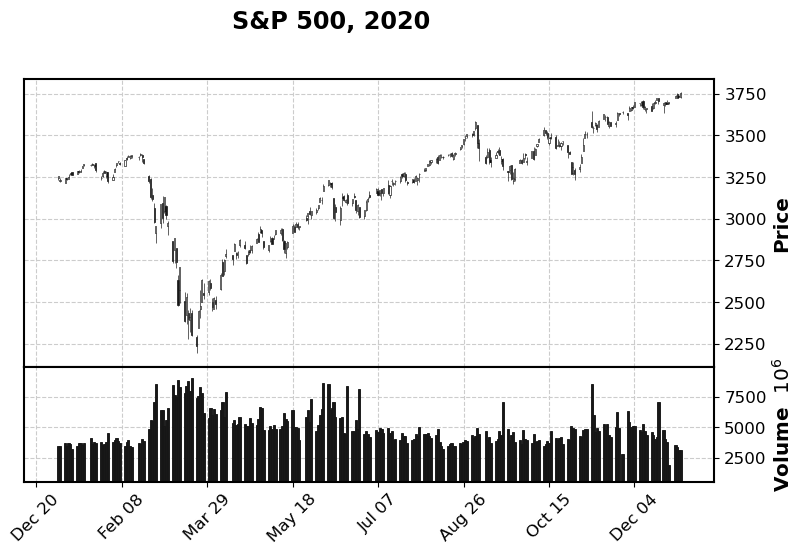

In [10]:
#line format
data.loc['2020', 'Close'].plot()
#Candlestick format
fplt.plot(data.loc['2020-01-01': '2021-01-01', :], type = 'candle', 
          style = 'classic', volume  = True, show_nontrading = True,
           figratio = (10,6), title = 'S&P 500, 2020')

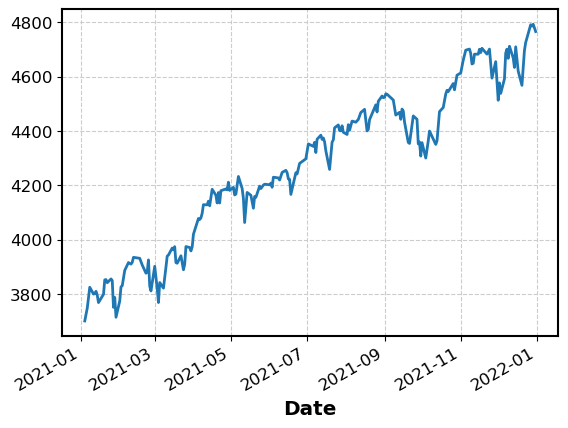

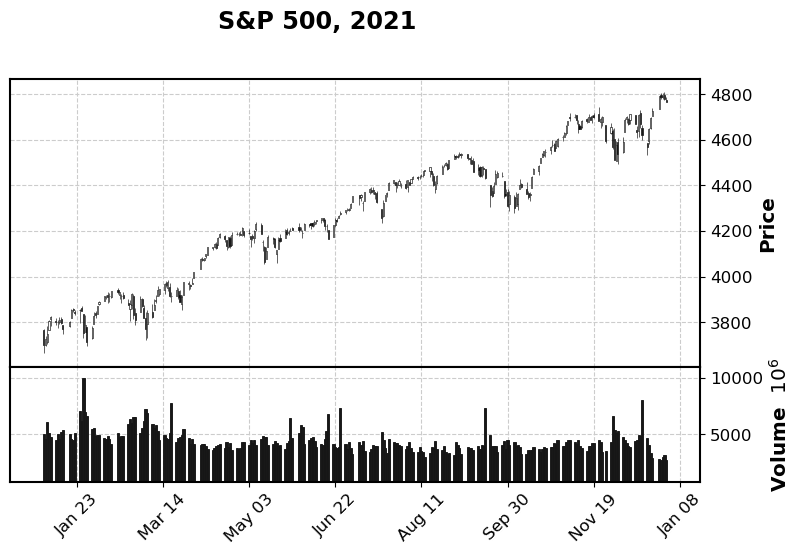

In [11]:
#line format
data.loc['2021', 'Close'].plot()
#Candlestick format
fplt.plot(data.loc['2021-01-01': '2022-01-01', :], type = 'candle', 
          style = 'classic', volume  = True, show_nontrading = True,
           figratio = (10,6), title = 'S&P 500, 2021')

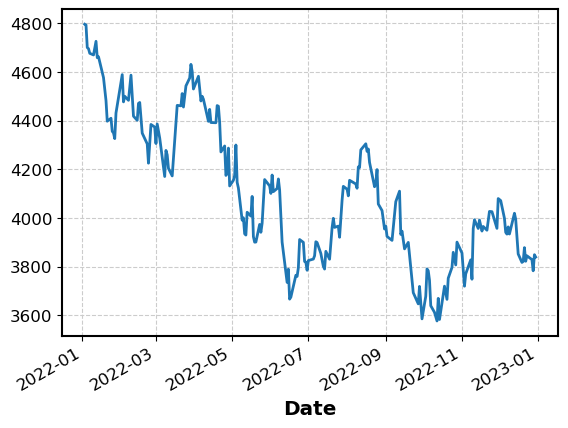

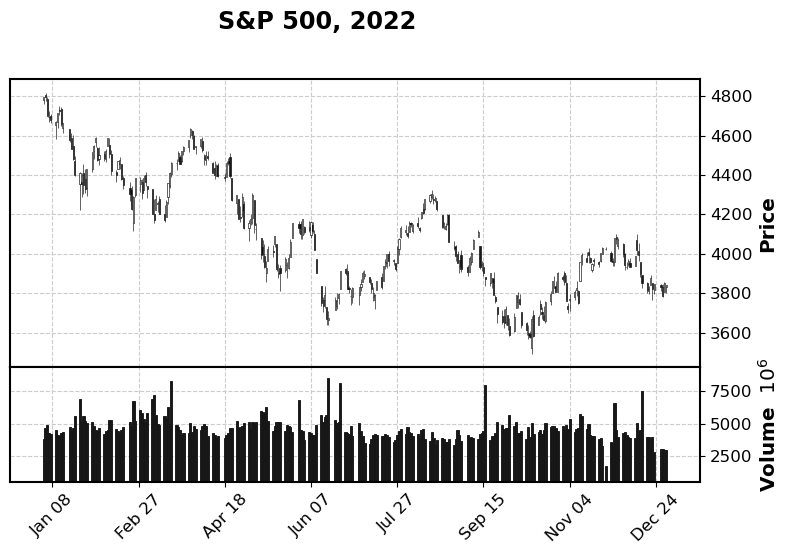

In [12]:
#line format
data.loc['2022', 'Close'].plot()
#Candlestick format
fplt.plot(data.loc['2022-01-01': '2023-01-01', :], type = 'candle', 
          style = 'classic', volume  = True, show_nontrading = True,
           figratio = (10,6), title = 'S&P 500, 2022')

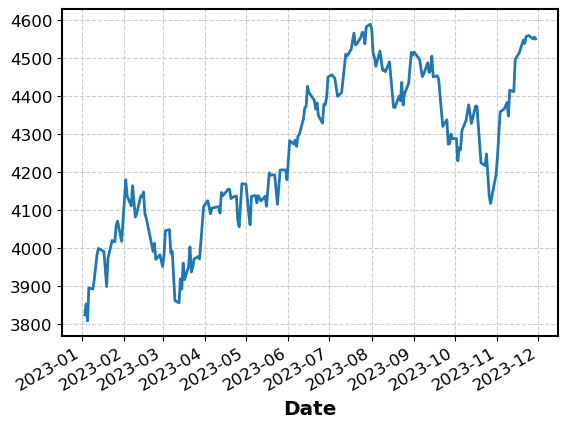

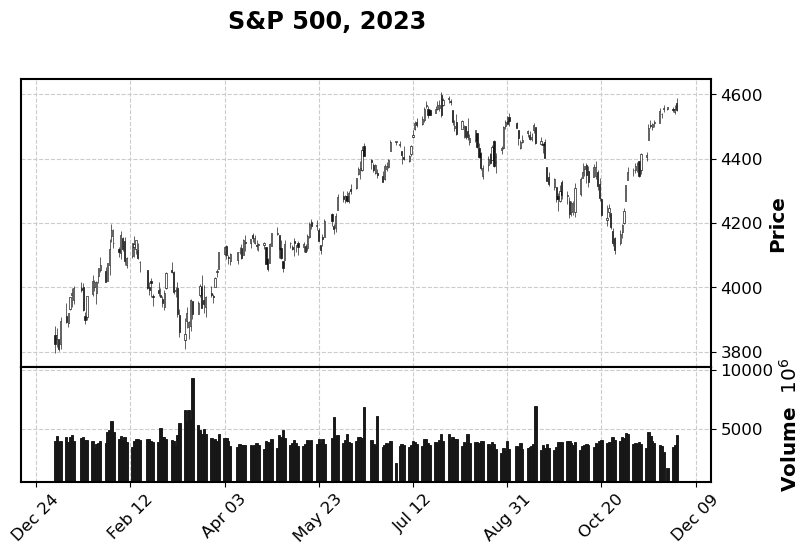

In [13]:
#line format
data.loc['2023', 'Close'].plot()
#Candlestick format
fplt.plot(data.loc['2023-01-01': '2023-12-01', :], type = 'candle', 
          style = 'classic', volume  = True, show_nontrading = True,
           figratio = (10,6), title = 'S&P 500, 2023')

There are Technical analysis libraries in Python and here I use ta library to caculate SMA (Simple Moving Average), EMA(Exponantioal Moving Average), and RSI (Relative Strenght Index) which are stong tools in stock technical analysis using the price and volume of trades

Based on technical rules, I use CLOSE price for SMA and EMA and OPEN price for RSI 

As we have a large period of time in daily time frame, I use 20 days lag for SMA and EMA and 5 days for RSI.

In [14]:
import ta

In [15]:
#Simple Moving Average(SMA)
sma = ta.trend.sma_indicator(data['Close'], 20)

In [16]:
sma.head(25)

Date
2017-01-03            NaN
2017-01-04            NaN
2017-01-05            NaN
2017-01-06            NaN
2017-01-09            NaN
2017-01-10            NaN
2017-01-11            NaN
2017-01-12            NaN
2017-01-13            NaN
2017-01-17            NaN
2017-01-18            NaN
2017-01-19            NaN
2017-01-20            NaN
2017-01-23            NaN
2017-01-24            NaN
2017-01-25            NaN
2017-01-26            NaN
2017-01-27            NaN
2017-01-30            NaN
2017-01-31    2275.115979
2017-02-01    2276.201978
2017-02-02    2276.706982
2017-02-03    2278.127979
2017-02-06    2278.906982
2017-02-07    2280.115991
Name: sma_20, dtype: float64

In [17]:
sma.tail()

Date
2023-11-22    4374.675464
2023-11-24    4395.780957
2023-11-27    4417.433960
2023-11-28    4436.837476
2023-11-29    4454.676489
Name: sma_20, dtype: float64

In [18]:
#Exponential Moving Average(EMA)
ema = ta.trend.ema_indicator(data['Close'], 20)

In [19]:
ema.head(25)

Date
2017-01-03            NaN
2017-01-04            NaN
2017-01-05            NaN
2017-01-06            NaN
2017-01-09            NaN
2017-01-10            NaN
2017-01-11            NaN
2017-01-12            NaN
2017-01-13            NaN
2017-01-17            NaN
2017-01-18            NaN
2017-01-19            NaN
2017-01-20            NaN
2017-01-23            NaN
2017-01-24            NaN
2017-01-25            NaN
2017-01-26            NaN
2017-01-27            NaN
2017-01-30            NaN
2017-01-31    2276.082767
2017-02-01    2276.412985
2017-02-02    2276.835567
2017-02-03    2278.795982
2017-02-06    2280.106846
2017-02-07    2281.342392
Name: ema_20, dtype: float64

In [20]:
ema.tail()

Date
2023-11-22    4424.704695
2023-11-24    4437.527090
2023-11-27    4448.279765
2023-11-28    4458.433134
2023-11-29    4467.209033
Name: ema_20, dtype: float64

In [21]:
#Relative Strength Index (RSI)
rsi = ta.momentum.rsi(data['Open'], 3)

In [22]:
rsi.head(6)

Date
2017-01-03           NaN
2017-01-04           NaN
2017-01-05    100.000000
2017-01-06    100.000000
2017-01-09    100.000000
2017-01-10     63.998708
Name: rsi, dtype: float64

In [23]:
rsi.tail()

Date
2023-11-22    94.924416
2023-11-24    95.288477
2023-11-27    91.830236
2023-11-28    60.526950
2023-11-29    83.848275
Name: rsi, dtype: float64

In [24]:
data['rsi'] = rsi
data.head(7)

,Open,High,Low,Close,Adj Close,Volume,rsi
Date,,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000,NaN
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000,NaN
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000,100.000000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000,100.000000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000,100.000000
2017-01-10,2269.719971,2279.270020,2265.270020,2268.899902,2268.899902,3640560000,63.998708
2017-01-11,2268.600098,2275.320068,2260.830078,2275.320068,2275.320068,3625080000,55.349648


In [25]:
data['d_return'] = 0
for i in range(1, data.shape[0]):
    data.iloc[i, 7] = data.iloc[i, 3] / data.iloc[i - 1, 3] - 1
data.head(10)

C:\Users\akh300\AppData\Local\Temp\ipykernel_13364\2257216293.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.005722273788525856' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[i, 7] = data.iloc[i, 3] / data.iloc[i - 1, 3] - 1


,Open,High,Low,Close,Adj Close,Volume,rsi,d_return
Date,,,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000,NaN,0.000000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000,NaN,0.005722
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000,100.000000,-0.000771
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000,100.000000,0.003517
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000,100.000000,-0.003549
2017-01-10,2269.719971,2279.270020,2265.270020,2268.899902,2268.899902,3640560000,63.998708,0.000000
2017-01-11,2268.600098,2275.320068,2260.830078,2275.320068,2275.320068,3625080000,55.349648,0.002830
2017-01-12,2271.139893,2271.780029,2254.250000,2270.439941,2270.439941,3466220000,69.412265,-0.002145
2017-01-13,2272.739990,2278.679932,2271.510010,2274.639893,2274.639893,3090680000,76.428044,0.001850


In [26]:
data['volume_change'] = 0
for i in range(1, data.shape[0]):
    data.iloc[i, 8] = data.iloc[i, 4] / data.iloc[i - 1, 4] - 1
data.head(10)

C:\Users\akh300\AppData\Local\Temp\ipykernel_13364\2956744087.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.005722273788525856' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[i, 8] = data.iloc[i, 4] / data.iloc[i - 1, 4] - 1


,Open,High,Low,Close,Adj Close,Volume,rsi,d_return,volume_change
Date,,,,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000,NaN,0.000000,0.000000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000,NaN,0.005722,0.005722
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000,100.000000,-0.000771,-0.000771
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000,100.000000,0.003517,0.003517
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000,100.000000,-0.003549,-0.003549
2017-01-10,2269.719971,2279.270020,2265.270020,2268.899902,2268.899902,3640560000,63.998708,0.000000,0.000000
2017-01-11,2268.600098,2275.320068,2260.830078,2275.320068,2275.320068,3625080000,55.349648,0.002830,0.002830
2017-01-12,2271.139893,2271.780029,2254.250000,2270.439941,2270.439941,3466220000,69.412265,-0.002145,-0.002145
2017-01-13,2272.739990,2278.679932,2271.510010,2274.639893,2274.639893,3090680000,76.428044,0.001850,0.001850


In [27]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,rsi,d_return,volume_change
Date,,,,,,,,,
2023-11-22,4553.040039,4568.430176,4545.049805,4556.620117,4556.620117,3042810000,94.924416,0.004061,0.004061
2023-11-24,4555.839844,4560.310059,4552.799805,4559.339844,4559.339844,1639500000,95.288477,0.000597,0.000597
2023-11-27,4554.859863,4560.520020,4546.319824,4550.430176,4550.430176,3403990000,91.830236,-0.001954,-0.001954
2023-11-28,4545.549805,4568.140137,4540.509766,4554.890137,4554.890137,3586240000,60.526950,0.000980,0.000980
2023-11-29,4571.839844,4587.640137,4547.149902,4550.580078,4550.580078,4418760000,83.848275,-0.000946,-0.000946


Now, we can plot the d_return plot which is stationary and also we can plot it in histogram format to see the probability distribution of daily returns

<Axes: xlabel='Date'>

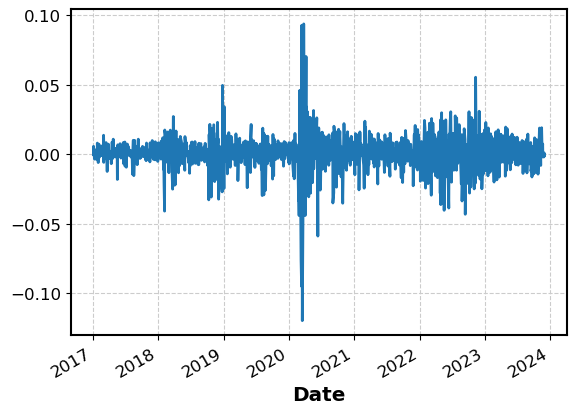

In [28]:
#Plot daily return
data['d_return'].plot()

C:\Users\akh300\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\akh300\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='d_return', ylabel='Probability'>

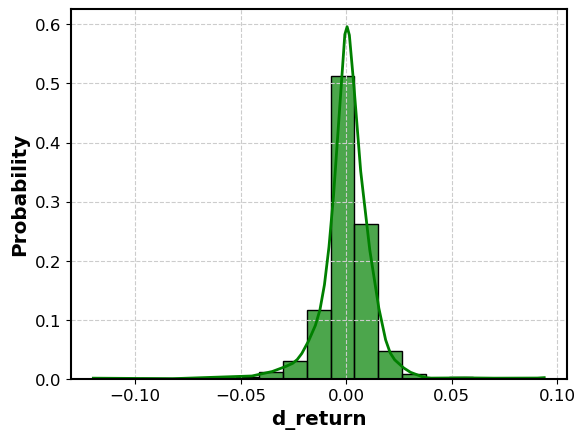

In [29]:
#Plot daily return HISTOGRAM
sns.histplot(data['d_return'], stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(data.d_return), max(data.d_return), 20))

In [30]:
data['d_return'].describe()

count    1739.000000
mean        0.000478
std         0.012213
min        -0.119841
25%        -0.003933
50%         0.000703
75%         0.006262
max         0.093828
Name: d_return, dtype: float64

Now, I add 5 days lag for daily return and volume change columns

In [31]:
#daily return lags
data['r_lag1'] = data['d_return'].shift(1)
data['r_lag2'] = data['d_return'].shift(2)
data['r_lag3'] = data['d_return'].shift(3)
data['r_lag4'] = data['d_return'].shift(4)
data['r_lag5'] = data['d_return'].shift(5)
data.head(10)

,Open,High,Low,Close,Adj Close,Volume,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5
Date,,,,,,,,,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000,NaN,0.005722,0.005722,0.000000,NaN,NaN,NaN,NaN
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000,100.000000,-0.000771,-0.000771,0.005722,0.000000,NaN,NaN,NaN
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000,100.000000,0.003517,0.003517,-0.000771,0.005722,0.000000,NaN,NaN
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000,100.000000,-0.003549,-0.003549,0.003517,-0.000771,0.005722,0.000000,NaN
2017-01-10,2269.719971,2279.270020,2265.270020,2268.899902,2268.899902,3640560000,63.998708,0.000000,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.000000
2017-01-11,2268.600098,2275.320068,2260.830078,2275.320068,2275.320068,3625080000,55.349648,0.002830,0.002830,0.000000,-0.003549,0.003517,-0.000771,0.005722
2017-01-12,2271.139893,2271.780029,2254.250000,2270.439941,2270.439941,3466220000,69.412265,-0.002145,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.000771
2017-01-13,2272.739990,2278.679932,2271.510010,2274.639893,2274.639893,3090680000,76.428044,0.001850,0.001850,-0.002145,0.002830,0.000000,-0.003549,0.003517


In [32]:
#volume change lags
data['v_lag1'] = data['volume_change'].shift(1)
data['v_lag2'] = data['volume_change'].shift(2)
data['v_lag3'] = data['volume_change'].shift(3)
data['v_lag4'] = data['volume_change'].shift(4)
data['v_lag5'] = data['volume_change'].shift(5)
data.head(10)

,Open,High,Low,Close,Adj Close,Volume,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,,,,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000,NaN,0.005722,0.005722,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000,100.000000,-0.000771,-0.000771,0.005722,0.000000,NaN,NaN,NaN,0.005722,0.000000,NaN,NaN,NaN
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000,100.000000,0.003517,0.003517,-0.000771,0.005722,0.000000,NaN,NaN,-0.000771,0.005722,0.000000,NaN,NaN
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000,100.000000,-0.003549,-0.003549,0.003517,-0.000771,0.005722,0.000000,NaN,0.003517,-0.000771,0.005722,0.000000,NaN
2017-01-10,2269.719971,2279.270020,2265.270020,2268.899902,2268.899902,3640560000,63.998708,0.000000,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.000000
2017-01-11,2268.600098,2275.320068,2260.830078,2275.320068,2275.320068,3625080000,55.349648,0.002830,0.002830,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.000000,-0.003549,0.003517,-0.000771,0.005722
2017-01-12,2271.139893,2271.780029,2254.250000,2270.439941,2270.439941,3466220000,69.412265,-0.002145,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.000771,0.002830,0.000000,-0.003549,0.003517,-0.000771
2017-01-13,2272.739990,2278.679932,2271.510010,2274.639893,2274.639893,3090680000,76.428044,0.001850,0.001850,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.002145,0.002830,0.000000,-0.003549,0.003517


At this step, I add a binary column to define the market trend in each day. So, if there is a positive daily return it will show 1 and if there was zero or negative it shows 0 using np.select conditions.

In [33]:
conditions = [data['d_return'] <= 0,
              data['d_return'] > 0]
values = [0, 1]
data['trend'] = np.select(conditions, values)
data.head(10)

,Open,High,Low,Close,Adj Close,Volume,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000,NaN,0.005722,0.005722,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000,100.000000,-0.000771,-0.000771,0.005722,0.000000,NaN,NaN,NaN,0.005722,0.000000,NaN,NaN,NaN,0
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000,100.000000,0.003517,0.003517,-0.000771,0.005722,0.000000,NaN,NaN,-0.000771,0.005722,0.000000,NaN,NaN,1
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000,100.000000,-0.003549,-0.003549,0.003517,-0.000771,0.005722,0.000000,NaN,0.003517,-0.000771,0.005722,0.000000,NaN,0
2017-01-10,2269.719971,2279.270020,2265.270020,2268.899902,2268.899902,3640560000,63.998708,0.000000,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.000000,0
2017-01-11,2268.600098,2275.320068,2260.830078,2275.320068,2275.320068,3625080000,55.349648,0.002830,0.002830,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.000000,-0.003549,0.003517,-0.000771,0.005722,1
2017-01-12,2271.139893,2271.780029,2254.250000,2270.439941,2270.439941,3466220000,69.412265,-0.002145,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.000771,0.002830,0.000000,-0.003549,0.003517,-0.000771,0
2017-01-13,2272.739990,2278.679932,2271.510010,2274.639893,2274.639893,3090680000,76.428044,0.001850,0.001850,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.002145,0.002830,0.000000,-0.003549,0.003517,1


Now, to clean my data and ignoring the NaN cells, I remove the first 6 rows.

In [34]:
data.drop(index = data.index[list(range(6))], inplace = True)
data.head(10)

,Open,High,Low,Close,Adj Close,Volume,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,
2017-01-11,2268.600098,2275.320068,2260.830078,2275.320068,2275.320068,3625080000,55.349648,0.002830,0.002830,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.000000,-0.003549,0.003517,-0.000771,0.005722,1
2017-01-12,2271.139893,2271.780029,2254.250000,2270.439941,2270.439941,3466220000,69.412265,-0.002145,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.000771,0.002830,0.000000,-0.003549,0.003517,-0.000771,0
2017-01-13,2272.739990,2278.679932,2271.510010,2274.639893,2274.639893,3090680000,76.428044,0.001850,0.001850,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.002145,0.002830,0.000000,-0.003549,0.003517,1
2017-01-17,2269.139893,2272.080078,2262.810059,2267.889893,2267.889893,3586950000,43.080303,-0.002968,-0.002968,0.001850,-0.002145,0.002830,0.000000,-0.003549,0.001850,-0.002145,0.002830,0.000000,-0.003549,0
2017-01-18,2269.139893,2272.010010,2263.350098,2271.889893,2271.889893,3317670000,43.080303,0.001764,0.001764,-0.002968,0.001850,-0.002145,0.002830,0.000000,-0.002968,0.001850,-0.002145,0.002830,0.000000,1
2017-01-19,2271.899902,2274.330078,2258.409912,2263.689941,2263.689941,3168390000,67.523620,-0.003609,-0.003609,0.001764,-0.002968,0.001850,-0.002145,0.002830,0.001764,-0.002968,0.001850,-0.002145,0.002830,0
2017-01-20,2269.959961,2276.959961,2265.010010,2271.310059,2271.310059,3536850000,46.479584,0.003366,0.003366,-0.003609,0.001764,-0.002968,0.001850,-0.002145,-0.003609,0.001764,-0.002968,0.001850,-0.002145,1
2017-01-23,2267.780029,2271.780029,2257.020020,2265.199951,2265.199951,3155240000,30.472144,-0.002690,-0.002690,0.003366,-0.003609,0.001764,-0.002968,0.001850,0.003366,-0.003609,0.001764,-0.002968,0.001850,0
2017-01-24,2267.879883,2284.629883,2266.679932,2280.070068,2280.070068,3816950000,32.079356,0.006565,0.006565,-0.002690,0.003366,-0.003609,0.001764,-0.002968,-0.002690,0.003366,-0.003609,0.001764,-0.002968,1


At this step, I use correlation analysis for the data. So, based on technical rules, I do correlation analysis between RSI and Daily returns VERSUS daily return lags and also correlation analysis between Daily returns VERSUS Volume change lags

In [35]:
#corr btw daily return and rsi & d_return lags
corr_table1 = round(data.iloc[:, [7, 6, 9, 10, 11, 12, 13]].corr(method = 'pearson'), 2)
corr_table1

,d_return,rsi,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5
d_return,1.00,0.13,-0.17,0.10,-0.02,-0.06,0.06
rsi,0.13,1.00,0.49,0.35,0.26,0.16,0.12
r_lag1,-0.17,0.49,1.00,-0.17,0.10,-0.02,-0.06
r_lag2,0.10,0.35,-0.17,1.00,-0.17,0.10,-0.02
r_lag3,-0.02,0.26,0.10,-0.17,1.00,-0.17,0.10
r_lag4,-0.06,0.16,-0.02,0.10,-0.17,1.00,-0.17
r_lag5,0.06,0.12,-0.06,-0.02,0.10,-0.17,1.00


In [36]:
#corr btw daily return and v_change lags
corr_table2 = round(data.iloc[:, [7, 14, 15, 16, 17, 18]].corr(method = 'pearson'), 2)
corr_table2

,d_return,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
d_return,1.00,-0.17,0.10,-0.02,-0.06,0.06
v_lag1,-0.17,1.00,-0.17,0.10,-0.02,-0.06
v_lag2,0.10,-0.17,1.00,-0.17,0.10,-0.02
v_lag3,-0.02,0.10,-0.17,1.00,-0.17,0.10
v_lag4,-0.06,-0.02,0.10,-0.17,1.00,-0.17
v_lag5,0.06,-0.06,-0.02,0.10,-0.17,1.00


In [37]:
data.shape

(1733, 20)

In [38]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,
2017-01-11,2268.600098,2275.320068,2260.830078,2275.320068,2275.320068,3625080000,55.349648,0.002830,0.002830,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.000000,-0.003549,0.003517,-0.000771,0.005722,1
2017-01-12,2271.139893,2271.780029,2254.250000,2270.439941,2270.439941,3466220000,69.412265,-0.002145,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.000771,0.002830,0.000000,-0.003549,0.003517,-0.000771,0
2017-01-13,2272.739990,2278.679932,2271.510010,2274.639893,2274.639893,3090680000,76.428044,0.001850,0.001850,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.002145,0.002830,0.000000,-0.003549,0.003517,1
2017-01-17,2269.139893,2272.080078,2262.810059,2267.889893,2267.889893,3586950000,43.080303,-0.002968,-0.002968,0.001850,-0.002145,0.002830,0.000000,-0.003549,0.001850,-0.002145,0.002830,0.000000,-0.003549,0
2017-01-18,2269.139893,2272.010010,2263.350098,2271.889893,2271.889893,3317670000,43.080303,0.001764,0.001764,-0.002968,0.001850,-0.002145,0.002830,0.000000,-0.002968,0.001850,-0.002145,0.002830,0.000000,1


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1733 entries, 2017-01-11 to 2023-11-29
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1733 non-null   float64
 1   High           1733 non-null   float64
 2   Low            1733 non-null   float64
 3   Close          1733 non-null   float64
 4   Adj Close      1733 non-null   float64
 5   Volume         1733 non-null   int64  
 6   rsi            1733 non-null   float64
 7   d_return       1733 non-null   float64
 8   volume_change  1733 non-null   float64
 9   r_lag1         1733 non-null   float64
 10  r_lag2         1733 non-null   float64
 11  r_lag3         1733 non-null   float64
 12  r_lag4         1733 non-null   float64
 13  r_lag5         1733 non-null   float64
 14  v_lag1         1733 non-null   float64
 15  v_lag2         1733 non-null   float64
 16  v_lag3         1733 non-null   float64
 17  v_lag4         1733 non-null   flo

Now, the data is ready to divide it into train part and test part.

I train on 2017, test on 2018 and use 2019 untill now as my real data.

In [40]:
train = data.loc['2017', ]
train

,Open,High,Low,Close,Adj Close,Volume,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,
2017-01-11,2268.600098,2275.320068,2260.830078,2275.320068,2275.320068,3625080000,55.349648,0.002830,0.002830,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.000000,-0.003549,0.003517,-0.000771,0.005722,1
2017-01-12,2271.139893,2271.780029,2254.250000,2270.439941,2270.439941,3466220000,69.412265,-0.002145,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.000771,0.002830,0.000000,-0.003549,0.003517,-0.000771,0
2017-01-13,2272.739990,2278.679932,2271.510010,2274.639893,2274.639893,3090680000,76.428044,0.001850,0.001850,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.002145,0.002830,0.000000,-0.003549,0.003517,1
2017-01-17,2269.139893,2272.080078,2262.810059,2267.889893,2267.889893,3586950000,43.080303,-0.002968,-0.002968,0.001850,-0.002145,0.002830,0.000000,-0.003549,0.001850,-0.002145,0.002830,0.000000,-0.003549,0
2017-01-18,2269.139893,2272.010010,2263.350098,2271.889893,2271.889893,3317670000,43.080303,0.001764,0.001764,-0.002968,0.001850,-0.002145,0.002830,0.000000,-0.002968,0.001850,-0.002145,0.002830,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,2684.219971,2685.350098,2678.129883,2683.340088,2683.340088,2401030000,59.462413,-0.000458,-0.000458,0.001986,-0.000828,-0.003230,0.005363,0.008974,0.001986,-0.000828,-0.003230,0.005363,0.008974,0
2017-12-26,2679.090088,2682.739990,2677.959961,2680.500000,2680.500000,1970660000,40.157794,-0.001058,-0.001058,-0.000458,0.001986,-0.000828,-0.003230,0.005363,-0.000458,0.001986,-0.000828,-0.003230,0.005363,0
2017-12-27,2682.100098,2685.639893,2678.909912,2682.620117,2682.620117,2202900000,53.456978,0.000791,0.000791,-0.001058,-0.000458,0.001986,-0.000828,-0.003230,-0.001058,-0.000458,0.001986,-0.000828,-0.003230,1


In [41]:
test = data.loc['2018', ]
test

,Open,High,Low,Close,Adj Close,Volume,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000,44.973264,0.008303,0.008303,-0.005183,0.001834,0.000791,-0.001058,-0.000458,-0.005183,0.001834,0.000791,-0.001058,-0.000458,1
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000,78.829612,0.006399,0.006399,0.008303,-0.005183,0.001834,0.000791,-0.001058,0.008303,-0.005183,0.001834,0.000791,-0.001058,1
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000,91.188721,0.004029,0.004029,0.006399,0.008303,-0.005183,0.001834,0.000791,0.006399,0.008303,-0.005183,0.001834,0.000791,1
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000,94.088315,0.007034,0.007034,0.004029,0.006399,0.008303,-0.005183,0.001834,0.004029,0.006399,0.008303,-0.005183,0.001834,1
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000,95.966603,0.001662,0.001662,0.007034,0.004029,0.006399,0.008303,-0.005183,0.007034,0.004029,0.006399,0.008303,-0.005183,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,2613670000,1.175900,-0.027112,-0.027112,-0.020588,-0.015772,-0.015396,0.000086,-0.020773,-0.020588,-0.015772,-0.015396,0.000086,-0.020773,0
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,4249740000,0.820126,0.049594,0.049594,-0.027112,-0.020588,-0.015772,-0.015396,0.000086,-0.027112,-0.020588,-0.015772,-0.015396,0.000086,1
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,2488.830078,4139010000,49.455033,0.008563,0.008563,0.049594,-0.027112,-0.020588,-0.015772,-0.015396,0.049594,-0.027112,-0.020588,-0.015772,-0.015396,1


In [42]:
real = data.loc['2019':, ]
real

,Open,High,Low,Close,Adj Close,Volume,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,51.377691,0.001268,0.001268,0.008492,-0.001242,0.008563,0.049594,-0.027112,0.008492,-0.001242,0.008563,0.049594,-0.027112,1
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000,60.663040,-0.024757,-0.024757,0.001268,0.008492,-0.001242,0.008563,0.049594,0.001268,0.008492,-0.001242,0.008563,0.049594,0
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000,45.378943,0.034336,0.034336,-0.024757,0.001268,0.008492,-0.001242,0.008563,-0.024757,0.001268,0.008492,-0.001242,0.008563,1
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000,76.422196,0.007010,0.007010,0.034336,-0.024757,0.001268,0.008492,-0.001242,0.034336,-0.024757,0.001268,0.008492,-0.001242,1
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000,83.763290,0.009695,0.009695,0.007010,0.034336,-0.024757,0.001268,0.008492,0.007010,0.034336,-0.024757,0.001268,0.008492,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,4553.040039,4568.430176,4545.049805,4556.620117,4556.620117,3042810000,94.924416,0.004061,0.004061,-0.002021,0.007390,0.001282,0.001190,0.001597,-0.002021,0.007390,0.001282,0.001190,0.001597,1
2023-11-24,4555.839844,4560.310059,4552.799805,4559.339844,4559.339844,1639500000,95.288477,0.000597,0.000597,0.004061,-0.002021,0.007390,0.001282,0.001190,0.004061,-0.002021,0.007390,0.001282,0.001190,1
2023-11-27,4554.859863,4560.520020,4546.319824,4550.430176,4550.430176,3403990000,91.830236,-0.001954,-0.001954,0.000597,0.004061,-0.002021,0.007390,0.001282,0.000597,0.004061,-0.002021,0.007390,0.001282,0


Now I use Logistic Regression, Random Forest, Naive Bayes Classifier, Linear Discriminant Analysis (LDA), and Support Vector Machines as prediction models and calculate their ACCURACY, PRECISION, SENSITIVITY, and SPECIFICITY to evaluate each

1- LOGISTIC REGRESSION

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2017-01-11 to 2017-12-29
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           245 non-null    float64
 1   High           245 non-null    float64
 2   Low            245 non-null    float64
 3   Close          245 non-null    float64
 4   Adj Close      245 non-null    float64
 5   Volume         245 non-null    int64  
 6   rsi            245 non-null    float64
 7   d_return       245 non-null    float64
 8   volume_change  245 non-null    float64
 9   r_lag1         245 non-null    float64
 10  r_lag2         245 non-null    float64
 11  r_lag3         245 non-null    float64
 12  r_lag4         245 non-null    float64
 13  r_lag5         245 non-null    float64
 14  v_lag1         245 non-null    float64
 15  v_lag2         245 non-null    float64
 16  v_lag3         245 non-null    float64
 17  v_lag4         245 non-null    floa

In [44]:
#Define the feature set X 
X_train = train.loc[:, ['rsi', 
                        'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4',
                        'v_lag4']]

X_train = sm.add_constant(X_train) #adding a constant

In [45]:
X_train.head()

,const,rsi,r_lag1,r_lag2,r_lag3,r_lag4,v_lag4
Date,,,,,,,
2017-01-11,1.0,55.349648,0.000000,-0.003549,0.003517,-0.000771,-0.000771
2017-01-12,1.0,69.412265,0.002830,0.000000,-0.003549,0.003517,0.003517
2017-01-13,1.0,76.428044,-0.002145,0.002830,0.000000,-0.003549,-0.003549
2017-01-17,1.0,43.080303,0.001850,-0.002145,0.002830,0.000000,0.000000
2017-01-18,1.0,43.080303,-0.002968,0.001850,-0.002145,0.002830,0.002830


In [46]:
#Define response variable
y_train = train.loc[:, 'trend']

In [47]:
y_train.head()

Date
2017-01-11    1
2017-01-12    0
2017-01-13    1
2017-01-17    0
2017-01-18    1
Name: trend, dtype: int32

In [48]:
import statsmodels.api as sm
model_lr = sm.Logit(y_train, X_train).fit()
print(model_lr.summary())

Optimization terminated successfully.
         Current function value: 0.613490
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                  245
Model:                          Logit   Df Residuals:                      239
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                  0.1017
Time:                        11:19:23   Log-Likelihood:                -150.31
converged:                       True   LL-Null:                       -167.31
Covariance Type:            nonrobust   LLR p-value:                 2.365e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1945      0.560     -3.917      0.000      -3.292      -1.097
rsi            0.0471      0.

In [49]:
#Prediction on train
y_prob_train = model_lr.predict(X_train)
y_prob_train

Date
2017-01-11    0.675493
2017-01-12    0.592927
2017-01-13    0.857539
2017-01-17    0.362184
2017-01-18    0.563722
                ...   
2017-12-22    0.518523
2017-12-26    0.461395
2017-12-27    0.634542
2017-12-28    0.698043
2017-12-29    0.715295
Length: 245, dtype: float64

In [50]:
y_pred_train = [1 if _ > 0.5 else 0 for _ in y_prob_train] 
y_pred_train

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1]

In [51]:
#Accuracy
sum(y_pred_train == y_train) / len(y_train) * 100

65.71428571428571

In [52]:
#Confusion matrix for train dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[ 55  50]
 [ 34 106]]


In [53]:
#Prediction on test
X_test = test.loc[:, ['rsi', 
                      'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4',
                      'v_lag4']]

X_test = sm.add_constant(X_test) #adding a constant
X_test.head()

,const,rsi,r_lag1,r_lag2,r_lag3,r_lag4,v_lag4
Date,,,,,,,
2018-01-02,1.0,44.973264,-0.005183,0.001834,0.000791,-0.001058,-0.001058
2018-01-03,1.0,78.829612,0.008303,-0.005183,0.001834,0.000791,0.000791
2018-01-04,1.0,91.188721,0.006399,0.008303,-0.005183,0.001834,0.001834
2018-01-05,1.0,94.088315,0.004029,0.006399,0.008303,-0.005183,-0.005183
2018-01-08,1.0,95.966603,0.007034,0.004029,0.006399,0.008303,0.008303


In [54]:
y_test = test.loc[:, 'trend']
y_test.head()

Date
2018-01-02    1
2018-01-03    1
2018-01-04    1
2018-01-05    1
2018-01-08    1
Name: trend, dtype: int32

In [55]:
y_prob_test = model_lr.predict(X_test)
y_prob_test

Date
2018-01-02    0.726754
2018-01-03    0.494586
2018-01-04    0.347010
2018-01-05    0.432048
2018-01-08    0.172380
                ...   
2018-12-24    0.999414
2018-12-26    0.999988
2018-12-27    0.008510
2018-12-28    0.005431
2018-12-31    0.062051
Length: 251, dtype: float64

In [56]:
y_pred_test = pd.Series([1 if _ > 0.5 else 0 for _ in y_prob_test], index = y_prob_test.index)
y_pred_test

Date
2018-01-02    1
2018-01-03    0
2018-01-04    0
2018-01-05    0
2018-01-08    0
             ..
2018-12-24    1
2018-12-26    1
2018-12-27    0
2018-12-28    0
2018-12-31    0
Length: 251, dtype: int64

In [57]:
#Accuracy
sum(y_pred_test == y_test) / len(y_test) * 100

53.38645418326693

In [58]:
#Confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_lr = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix_lr)

[[61 58]
 [59 73]]


Here, I will evaluate the model with factors I mentioned:

In [70]:
#Accuracy = TP + TN / Total
#TP = 61, TN = 73
(61 + 73) / len(y_test) * 100

53.38645418326693

In [71]:
#Precision = TP / TP + FP
#TP = 61, FP = 58
61 / (61 + 58) * 100

51.26050420168067

In [72]:
#Sensitivity 
#TP / TP + FN
#TP = 61, FN = 59
61 / (61 + 59) * 100

50.83333333333333

In [73]:
#Specificity
#TN / TN + FP
#TN = 73, FP = 58
73 / (58 + 73) * 100

55.72519083969466

2- Random Forest

In [63]:
#Define the feature set X 
X_train = train.loc[:, ['rsi', 
                        'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4', 'r_lag5',
                        'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5']]

X_train.head()

,rsi,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,
2017-01-11,55.349648,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.000000,-0.003549,0.003517,-0.000771,0.005722
2017-01-12,69.412265,0.002830,0.000000,-0.003549,0.003517,-0.000771,0.002830,0.000000,-0.003549,0.003517,-0.000771
2017-01-13,76.428044,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.002145,0.002830,0.000000,-0.003549,0.003517
2017-01-17,43.080303,0.001850,-0.002145,0.002830,0.000000,-0.003549,0.001850,-0.002145,0.002830,0.000000,-0.003549
2017-01-18,43.080303,-0.002968,0.001850,-0.002145,0.002830,0.000000,-0.002968,0.001850,-0.002145,0.002830,0.000000


In [64]:
y_train.head()

Date
2017-01-11    1
2017-01-12    0
2017-01-13    1
2017-01-17    0
2017-01-18    1
Name: trend, dtype: int32

In [65]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest: Using 4 Features
model_rf = RandomForestClassifier(max_features = 4, random_state = 123, n_estimators = 500).fit(X_train, y_train)

In [66]:
#Prediction on test
X_test = test.loc[:, ['rsi', 
                      'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4', 'r_lag5',
                      'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5']]

X_test.head()

,rsi,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,
2018-01-02,44.973264,-0.005183,0.001834,0.000791,-0.001058,-0.000458,-0.005183,0.001834,0.000791,-0.001058,-0.000458
2018-01-03,78.829612,0.008303,-0.005183,0.001834,0.000791,-0.001058,0.008303,-0.005183,0.001834,0.000791,-0.001058
2018-01-04,91.188721,0.006399,0.008303,-0.005183,0.001834,0.000791,0.006399,0.008303,-0.005183,0.001834,0.000791
2018-01-05,94.088315,0.004029,0.006399,0.008303,-0.005183,0.001834,0.004029,0.006399,0.008303,-0.005183,0.001834
2018-01-08,95.966603,0.007034,0.004029,0.006399,0.008303,-0.005183,0.007034,0.004029,0.006399,0.008303,-0.005183


In [67]:
y_pred_rf = pd.Series(model_rf.predict(X_test), index = y_test.index)
y_pred_rf

Date
2018-01-02    1
2018-01-03    0
2018-01-04    0
2018-01-05    1
2018-01-08    0
             ..
2018-12-24    1
2018-12-26    1
2018-12-27    1
2018-12-28    0
2018-12-31    1
Length: 251, dtype: int32

In [68]:
#Accuracy
sum(y_pred_rf == y_test) / len(y_test) * 100

48.60557768924303

In [69]:
#Confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_rf)

[[40 79]
 [50 82]]


In [74]:
#Model evaluation
#Accuracy = TP + TN / Total
#TP = 40, TN = 82
(40 + 82) / len(y_test) * 100

48.60557768924303

In [75]:
#Precision = TP / TP + FP
#TP = 40, FP = 79
40 / (40 + 79) * 100

33.61344537815126

In [76]:
#Sensitivity 
#TP / TP + FN
#TP = 40, FN = 50
40 / (40 + 50) * 100

44.44444444444444

In [77]:
#Specificity
#TN / TN + FP
#TN = 82, FP = 79
82 / (79 + 82) * 100

50.931677018633536

3- Naive Bayes Classifier

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
model_nb = GaussianNB().fit(X_train, y_train)

In [80]:
#Prediction on test
y_pred_nb = pd.Series(model_nb.predict(X_test), index = y_test.index)
y_pred_nb

Date
2018-01-02    1
2018-01-03    0
2018-01-04    0
2018-01-05    0
2018-01-08    0
             ..
2018-12-24    1
2018-12-26    1
2018-12-27    0
2018-12-28    1
2018-12-31    0
Length: 251, dtype: int32

In [81]:
#Confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(confusion_matrix_nb)

[[43 76]
 [51 81]]


In [82]:
#Accuracy
sum(y_pred_nb == y_test) / len(y_test) * 100

49.40239043824701

4- Linear Discriminant Analysis (LDA)

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [84]:
model_lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [85]:
#Prediction on test
y_pred_lda = pd.Series(model_lda.predict(X_test), index = y_test.index)
y_pred_lda

Date
2018-01-02    1
2018-01-03    1
2018-01-04    0
2018-01-05    0
2018-01-08    0
             ..
2018-12-24    1
2018-12-26    1
2018-12-27    0
2018-12-28    0
2018-12-31    0
Length: 251, dtype: int32

In [86]:
#Confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print(confusion_matrix_lda)

[[62 57]
 [58 74]]


In [87]:
#Accuracy
sum(y_pred_lda == y_test) / len(y_test) * 100

54.18326693227091

5- Support Vector Machines

As the Degree should be defined for this model, before modeling I use Cross validation analysis to determine the degree:

In [88]:
from sklearn.svm import SVC

In [89]:
#Cross-Validation on Polynomial kernel SVM
from sklearn.model_selection import cross_val_score
degree_grid = [2, 3, 4]
acc_scores = []
for d in degree_grid:
    svc = SVC(kernel = 'poly', degree = d, C = 1E6)
    scores = cross_val_score(svc, X_train, y_train, cv = 5, scoring = 'accuracy')
    acc_scores.append(scores.mean())
print(acc_scores)

[0.5428571428571429, 0.5591836734693878, 0.5346938775510204]


Text(0, 0.5, 'Cross-Validated Accuracy')

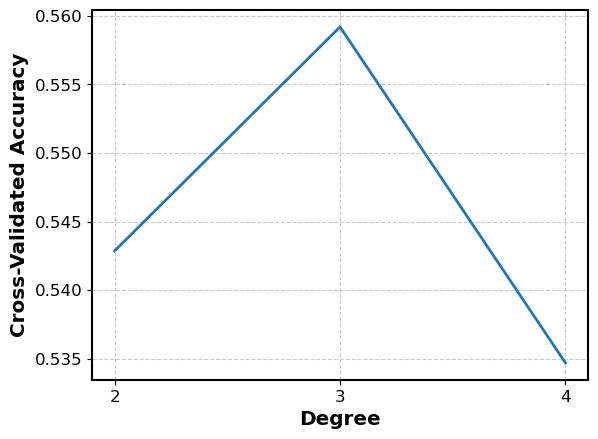

In [90]:
#Plot Cross-Validation Results for SVM
plt.plot(degree_grid, acc_scores)
plt.xticks(degree_grid)
plt.xlabel('Degree')
plt.ylabel('Cross-Validated Accuracy')

In [91]:
#Prediction on test
model_svc = SVC(kernel = 'poly', degree = 3, C = 1E6).fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
y_pred_svc

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1])

In [92]:
#Confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print(confusion_matrix_svc)

[[ 25  94]
 [ 28 104]]


In [93]:
#Accuracy
sum(y_pred_svc == y_test) / len(y_test) * 100

51.39442231075697

# Summary of results on test data 

Logistic Regression: 53.38

Random Forest: 48.60

Naive Bayes Classifier: 49.40

Linear Discriminant Analysis: 54.18

Support Vector Machines: 51.39

# Prediction on real data

In [94]:
#Define the feature set X 
X_real = real.loc[:, ['rsi', 
                      'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4', 'r_lag5',
                      'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5']]
X_real

,rsi,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,
2019-01-02,51.377691,0.008492,-0.001242,0.008563,0.049594,-0.027112,0.008492,-0.001242,0.008563,0.049594,-0.027112
2019-01-03,60.663040,0.001268,0.008492,-0.001242,0.008563,0.049594,0.001268,0.008492,-0.001242,0.008563,0.049594
2019-01-04,45.378943,-0.024757,0.001268,0.008492,-0.001242,0.008563,-0.024757,0.001268,0.008492,-0.001242,0.008563
2019-01-07,76.422196,0.034336,-0.024757,0.001268,0.008492,-0.001242,0.034336,-0.024757,0.001268,0.008492,-0.001242
2019-01-08,83.763290,0.007010,0.034336,-0.024757,0.001268,0.008492,0.007010,0.034336,-0.024757,0.001268,0.008492
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,94.924416,-0.002021,0.007390,0.001282,0.001190,0.001597,-0.002021,0.007390,0.001282,0.001190,0.001597
2023-11-24,95.288477,0.004061,-0.002021,0.007390,0.001282,0.001190,0.004061,-0.002021,0.007390,0.001282,0.001190
2023-11-27,91.830236,0.000597,0.004061,-0.002021,0.007390,0.001282,0.000597,0.004061,-0.002021,0.007390,0.001282


In [95]:
y_real = real.loc[:, 'trend']
y_real.head()

Date
2019-01-02    1
2019-01-03    0
2019-01-04    1
2019-01-07    1
2019-01-08    1
Name: trend, dtype: int32

In [96]:
y_pred_real = pd.Series(model_lda.predict(X_real), index = y_real.index)
y_pred_real

Date
2019-01-02    0
2019-01-03    0
2019-01-04    1
2019-01-07    0
2019-01-08    0
             ..
2023-11-22    1
2023-11-24    1
2023-11-27    1
2023-11-28    1
2023-11-29    1
Length: 1237, dtype: int32

In [97]:
#Accuracy
sum(y_pred_real == y_real) / len(y_real) * 100

56.58852061438965

In [98]:
#Confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_real = confusion_matrix(y_real, y_pred_real)
print(confusion_matrix_real)

[[322 247]
 [290 378]]


In [99]:
real['pred'] = y_pred_real
real

C:\Users\akh300\AppData\Local\Temp\ipykernel_13364\549372195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['pred'] = y_pred_real


,Open,High,Low,Close,Adj Close,Volume,rsi,d_return,volume_change,r_lag1,...,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend,pred
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,51.377691,0.001268,0.001268,0.008492,...,0.008563,0.049594,-0.027112,0.008492,-0.001242,0.008563,0.049594,-0.027112,1,0
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000,60.663040,-0.024757,-0.024757,0.001268,...,-0.001242,0.008563,0.049594,0.001268,0.008492,-0.001242,0.008563,0.049594,0,0
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000,45.378943,0.034336,0.034336,-0.024757,...,0.008492,-0.001242,0.008563,-0.024757,0.001268,0.008492,-0.001242,0.008563,1,1
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000,76.422196,0.007010,0.007010,0.034336,...,0.001268,0.008492,-0.001242,0.034336,-0.024757,0.001268,0.008492,-0.001242,1,0
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000,83.763290,0.009695,0.009695,0.007010,...,-0.024757,0.001268,0.008492,0.007010,0.034336,-0.024757,0.001268,0.008492,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,4553.040039,4568.430176,4545.049805,4556.620117,4556.620117,3042810000,94.924416,0.004061,0.004061,-0.002021,...,0.001282,0.001190,0.001597,-0.002021,0.007390,0.001282,0.001190,0.001597,1,1
2023-11-24,4555.839844,4560.310059,4552.799805,4559.339844,4559.339844,1639500000,95.288477,0.000597,0.000597,0.004061,...,0.007390,0.001282,0.001190,0.004061,-0.002021,0.007390,0.001282,0.001190,1,1
2023-11-27,4554.859863,4560.520020,4546.319824,4550.430176,4550.430176,3403990000,91.830236,-0.001954,-0.001954,0.000597,...,-0.002021,0.007390,0.001282,0.000597,0.004061,-0.002021,0.007390,0.001282,0,1


In [100]:
#Balance over time
real['balance'] = 0
real.head()

C:\Users\akh300\AppData\Local\Temp\ipykernel_13364\697889850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['balance'] = 0


,Open,High,Low,Close,Adj Close,Volume,rsi,d_return,volume_change,r_lag1,...,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend,pred,balance
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,51.377691,0.001268,0.001268,0.008492,...,0.049594,-0.027112,0.008492,-0.001242,0.008563,0.049594,-0.027112,1,0,0
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000,60.663040,-0.024757,-0.024757,0.001268,...,0.008563,0.049594,0.001268,0.008492,-0.001242,0.008563,0.049594,0,0,0
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000,45.378943,0.034336,0.034336,-0.024757,...,-0.001242,0.008563,-0.024757,0.001268,0.008492,-0.001242,0.008563,1,1,0
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000,76.422196,0.007010,0.007010,0.034336,...,0.008492,-0.001242,0.034336,-0.024757,0.001268,0.008492,-0.001242,1,0,0
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000,83.763290,0.009695,0.009695,0.007010,...,0.001268,0.008492,0.007010,0.034336,-0.024757,0.001268,0.008492,1,0,0


In [102]:
#initial deposit : $1000
real.iloc[0, 21] = 1000
real.head()

,Open,High,Low,Close,Adj Close,Volume,rsi,d_return,volume_change,r_lag1,...,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend,pred,balance
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,51.377691,0.001268,0.001268,0.008492,...,0.049594,-0.027112,0.008492,-0.001242,0.008563,0.049594,-0.027112,1,0,1000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000,60.663040,-0.024757,-0.024757,0.001268,...,0.008563,0.049594,0.001268,0.008492,-0.001242,0.008563,0.049594,0,0,0
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000,45.378943,0.034336,0.034336,-0.024757,...,-0.001242,0.008563,-0.024757,0.001268,0.008492,-0.001242,0.008563,1,1,0
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000,76.422196,0.007010,0.007010,0.034336,...,0.008492,-0.001242,0.034336,-0.024757,0.001268,0.008492,-0.001242,1,0,0
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000,83.763290,0.009695,0.009695,0.007010,...,0.001268,0.008492,0.007010,0.034336,-0.024757,0.001268,0.008492,1,0,0


In [105]:
#Trade Simulation
for i in range(1, real.shape[0]):
    if real.iloc[i, 20] == 1:
        real.iloc[i, 21] = real.iloc[i - 1, 21] * real.iloc[i, 3] / real.iloc[i, 2]
    if real.iloc[i, 20] == 0:
        real.iloc[i, 21] = real.iloc[i - 1, 21] * real.iloc[i, 2] / real.iloc[i, 3]

C:\Users\akh300\AppData\Local\Temp\ipykernel_13364\2579485212.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '998.3945635575602' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  real.iloc[i, 21] = real.iloc[i - 1, 21] * real.iloc[i, 2] / real.iloc[i, 3]


In [106]:
real

,Open,High,Low,Close,Adj Close,Volume,rsi,d_return,volume_change,r_lag1,...,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend,pred,balance
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,51.377691,0.001268,0.001268,0.008492,...,0.049594,-0.027112,0.008492,-0.001242,0.008563,0.049594,-0.027112,1,0,1000.000000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000,60.663040,-0.024757,-0.024757,0.001268,...,0.008563,0.049594,0.001268,0.008492,-0.001242,0.008563,0.049594,0,0,998.394564
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000,45.378943,0.034336,0.034336,-0.024757,...,-0.001242,0.008563,-0.024757,0.001268,0.008492,-0.001242,0.008563,1,1,1021.640199
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000,76.422196,0.007010,0.007010,0.034336,...,0.008492,-0.001242,0.034336,-0.024757,0.001268,0.008492,-0.001242,1,0,1011.570857
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000,83.763290,0.009695,0.009695,0.007010,...,0.001268,0.008492,0.007010,0.034336,-0.024757,0.001268,0.008492,1,0,1001.020661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,4553.040039,4568.430176,4545.049805,4556.620117,4556.620117,3042810000,94.924416,0.004061,0.004061,-0.002021,...,0.001190,0.001597,-0.002021,0.007390,0.001282,0.001190,0.001597,1,1,3633.625198
2023-11-24,4555.839844,4560.310059,4552.799805,4559.339844,4559.339844,1639500000,95.288477,0.000597,0.000597,0.004061,...,0.001282,0.001190,0.004061,-0.002021,0.007390,0.001282,0.001190,1,1,3638.844854
2023-11-27,4554.859863,4560.520020,4546.319824,4550.430176,4550.430176,3403990000,91.830236,-0.001954,-0.001954,0.000597,...,0.007390,0.001282,0.000597,0.004061,-0.002021,0.007390,0.001282,0,1,3642.134753


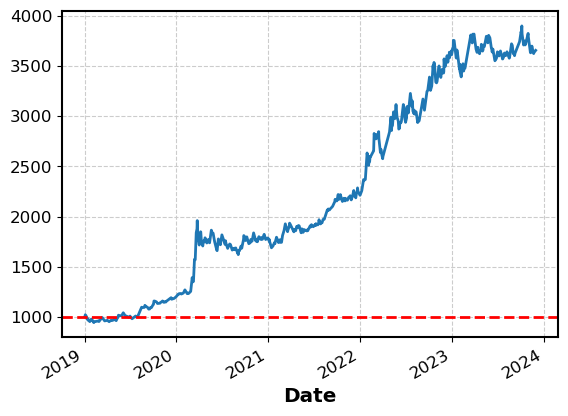

In [107]:
real.loc[:, 'balance'].plot()
plt.axhline(1000, color = 'red', linewidth = 2, linestyle = '--')